In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({"font.size":20})

# Read data

In [3]:
concentration = pd.read_csv("../Datasets/air_concentrations.csv")

In [4]:
concentration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84900 entries, 0 to 84899
Data columns (total 20 columns):
latitude       84900 non-null float64
longitude      84900 non-null float64
state_code     84900 non-null object
county         82783 non-null object
date_on        84900 non-null object
date_off       84900 non-null object
TSO4           82378 non-null float64
TNH4           82377 non-null float64
CA             82296 non-null float64
MG             82298 non-null float64
NA             82294 non-null float64
K              82210 non-null float64
CL             67363 non-null float64
NSO4           82388 non-null float64
NHNO3          82388 non-null float64
WSO2           82378 non-null float64
WNO3           8920 non-null float64
total_SO2      82369 non-null float64
total_NO3      82380 non-null float64
flow_volume    82861 non-null float64
dtypes: float64(16), object(4)
memory usage: 13.0+ MB


In [5]:
concentration.head()

,latitude,longitude,state_code,county,date_on,date_off,TSO4,TNH4,CA,MG,NA,K,CL,NSO4,NHNO3,WSO2,WNO3,total_SO2,total_NO3,flow_volume
0,39.988309,-79.251573,PA,Somerset,01/03/2000 16:37:00,01/10/2000 16:03:00,2.3406,0.7764,0.1267,0.0144,0.1740,0.0536,NaN,0.4753,1.1347,10.2084,0.5588,10.5254,1.8930,14.9233
1,39.988309,-79.251573,PA,Somerset,01/10/2000 16:09:00,01/17/2000 19:57:00,1.7681,0.9436,0.2127,0.0272,0.1700,0.0452,NaN,1.2391,1.3881,16.4770,0.4621,17.3035,2.3097,14.9819
2,39.988309,-79.251573,PA,Somerset,01/17/2000 20:07:00,01/24/2000 21:00:00,3.7462,0.9171,0.1410,0.0220,0.1805,0.0534,NaN,1.5380,3.2918,31.8606,0.8644,32.8865,4.1565,14.5267
3,39.988309,-79.251573,PA,Somerset,01/24/2000 21:11:00,01/31/2000 16:33:00,3.6490,1.4580,0.1359,0.0217,0.3100,0.0534,NaN,1.9024,3.1171,26.0389,1.0820,27.3078,4.5255,13.8887
4,39.988309,-79.251573,PA,Somerset,01/31/2000 16:40:00,02/07/2000 16:06:00,3.8717,0.8672,0.0944,0.0146,0.1143,0.0391,NaN,2.3108,4.8706,28.7423,0.7741,30.2836,5.6604,14.6524


In [9]:
def to_year(x):
    try:
        return int(x[6:10])
    except:
        return None

In [10]:
concentration["year"] = concentration["date_on"].apply(to_year)

In [15]:
polltants = concentration.columns[6:19].values
polltants

array(['TSO4', 'TNH4', 'CA', 'MG', 'NA', 'K', 'CL', 'NSO4', 'NHNO3',
       'WSO2', 'WNO3', 'total_SO2', 'total_NO3'], dtype=object)

In [18]:
c_each_state = concentration.groupby(["state_code", "year"])[polltants].sum().reset_index()

In [66]:
c_each_state["latitude"] = concentration.groupby(["state_code", "year"])["latitude"].mean().values
c_each_state["longitude"] = concentration.groupby(["state_code", "year"])["longitude"].mean().values

In [47]:
# county level
c_each_county = concentration.groupby(["state_code","county", "year"])[polltants].sum().reset_index()

In [50]:
c_each_county["latitude"] = concentration.groupby(["state_code","county", "year"])["latitude"].mean().values

In [51]:
c_each_county["longitude"] = concentration.groupby(["state_code","county", "year"])["longitude"].mean().values

In [53]:
c_each_county.to_csv("../AggregatedData/pollutant_concentration_by_county_year.csv")

# write to csv

In [37]:
c_each_state.to_csv("../AggregatedData/pollutant_concentration_by_state_year.csv", index=False)

In [27]:
c_each_state.head()

,state_code,year,TSO4,TNH4,CA,MG,NA,K,CL,NSO4,NHNO3,WSO2,WNO3,total_SO2,total_NO3
0,AK,2000,30.6402,7.2945,1.3514,0.6791,3.1649,2.4077,NaN,7.2252,8.1895,28.2964,9.4383,33.1156,15.3540
1,AK,2001,34.8446,6.5909,2.3623,0.6915,3.2312,0.8495,NaN,4.8928,8.5161,35.2390,8.2529,38.5015,14.9714
2,AK,2002,36.8374,7.9195,3.2205,0.9789,3.4978,1.8826,NaN,13.2493,13.9284,31.0982,1.3480,39.9362,21.6260
3,AK,2003,34.5709,5.5223,2.5747,0.9612,3.2455,1.3031,1.9649,12.4985,10.5177,30.8192,NaN,39.1557,15.8725
4,AK,2004,22.8321,8.5270,3.6536,0.9303,2.5129,2.3108,2.8712,9.6423,7.5887,18.3086,NaN,24.7405,15.9951


In [54]:
top_10_SO2_state = c_each_state.groupby("state_code")["total_SO2"].sum().sort_values(ascending=False).index[:10]
top_10_NO3_state = c_each_state.groupby("state_code")["total_NO3"].sum().sort_values(ascending=False).index[:10]
top_10_MG_state = c_each_state.groupby("state_code")["MG"].sum().sort_values(ascending=False).index[:10]

In [33]:
top_10_SO2_state

Index([u'PA', u'OH', u'KY', u'VA', u'IN', u'IL', u'MD', u'TN', u'HI', u'MI'], dtype='object', name=u'state_code')

In [56]:
top_10_NO3_state

Index([u'OH', u'KY', u'PA', u'CA', u'IL', u'MI', u'IN', u'NC', u'ON', u'TN'], dtype='object', name=u'state_code')

In [ ]:
'Texas', u'Indiana', u'Ohio', u'Illinois', u'Kentucky',
       u'West Virginia', u'Pennsylvania', u'North Carolina', u'Florida',
       u'Missouri

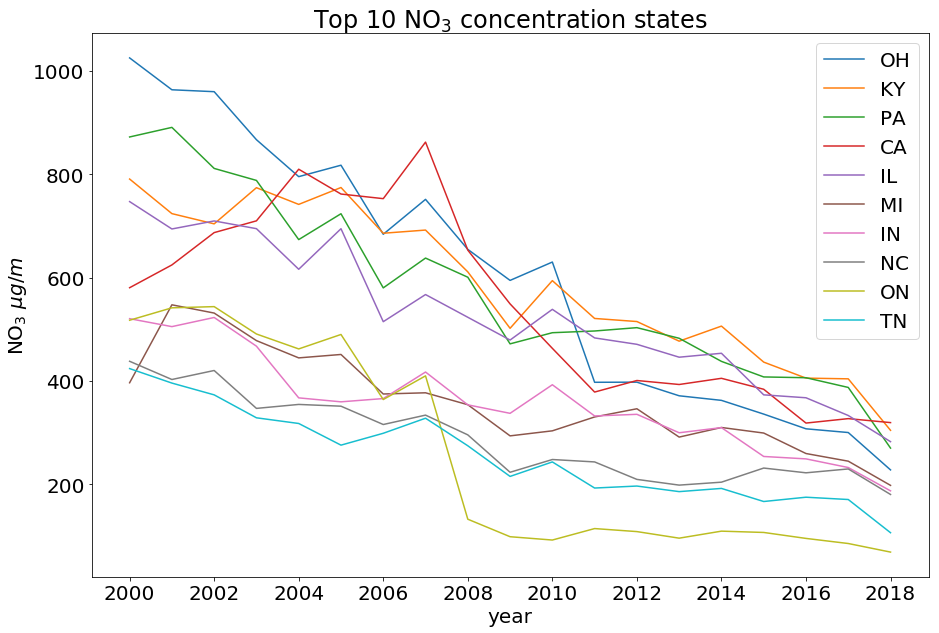

In [44]:
plt.figure(figsize=(15,10))
for state in top_10_NO3_state:
    c_s = c_each_state[c_each_state["state_code"] == state]
    plt.plot(c_s["year"], c_s["total_NO3"], label=state)
plt.legend()
plt.xlabel("year")
plt.xticks(range(2000, 2019, 2))
plt.ylabel("NO$_3$ $\mu g/m$")
plt.title("Top 10 NO$_3$ concentration states")
plt.savefig("../plots/NO3_vs_time.png", dpi=200)

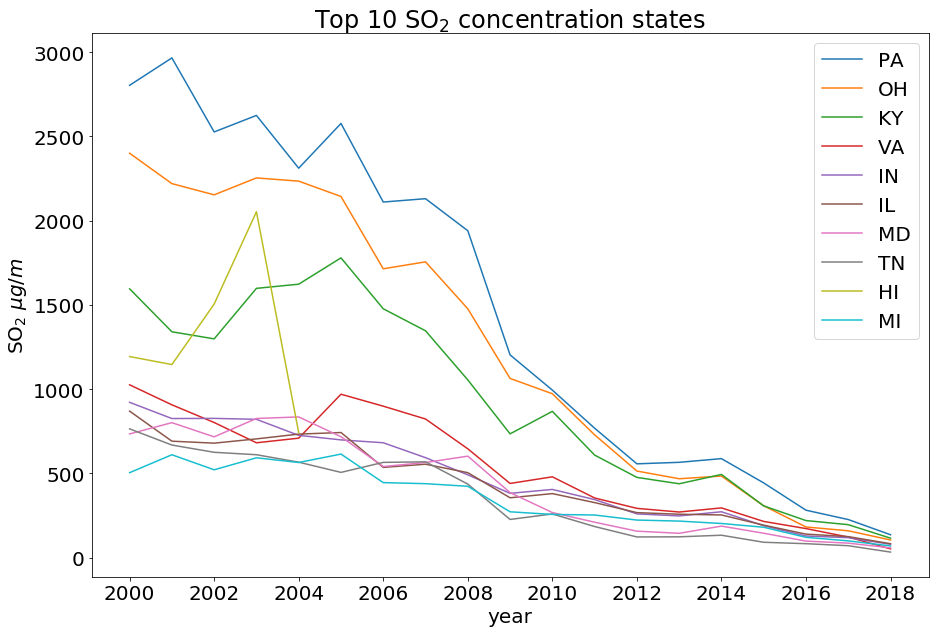

In [43]:
plt.figure(figsize=(15,10))
for state in top_10_SO2_state:
    c_s = c_each_state[c_each_state["state_code"] == state]
    plt.plot(c_s["year"], c_s["total_SO2"], label=state)
plt.legend()
plt.xlabel("year")
plt.xticks(range(2000, 2019, 2))
plt.ylabel("SO$_2$ $\mu g/m$")
plt.title("Top 10 SO$_2$ concentration states")
plt.savefig("../plots/SO2_vs_time.png", dpi=200)

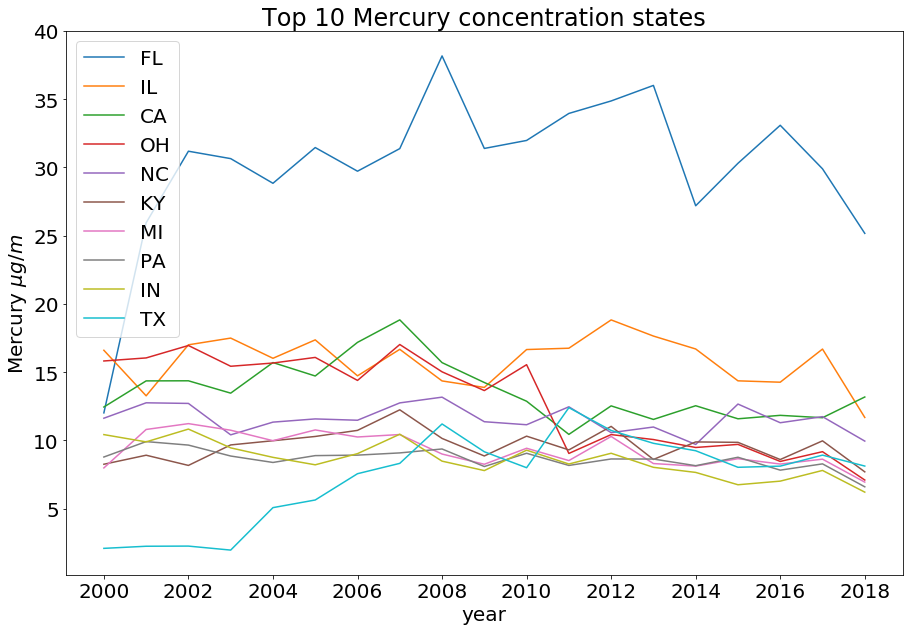

In [55]:
plt.figure(figsize=(15,10))
for state in top_10_MG_state:
    c_s = c_each_state[c_each_state["state_code"] == state]
    plt.plot(c_s["year"], c_s["MG"], label=state)
plt.legend()
plt.xlabel("year")
plt.xticks(range(2000, 2019, 2))
plt.ylabel("Mercury $\mu g/m$")
plt.title("Top 10 Mercury concentration states")
plt.savefig("../plots/MG_vs_time.png", dpi=200)

# heatmap

In [57]:
import shapefile
class World(object):
	"""docstring for Country"""
	def __init__(self):
		self.world = shapefile.Reader('world_admin_2008/world_admin_2008')
		shape = self.world.shapes()
		records = self.world.records()
		self._D = {}
		for i in range(len(shape)):
			cntry = records[i][6]
			self._D.setdefault(cntry, []).append(shape[i])
		self.ALL_COUNTRIES = self._D.keys()


	def __getitem__(self, key):
		if key not in self._D:	raise Exception(cntry + " not valid!!!")
		return self._D[key]

		

In [58]:
world = World()

In [59]:
shape_states = ["MN", "MT", "ND", "", "ID", "WA", "AZ", "CA", "CO", "NV", "NM", "OR", "UT", "WY", "AR", "IA", "KS",
               "MO", "NE", "OK", "SD", "LA", "TX","", "CT", "MA", "NH", "RI", "VT", "AL", "FL","GA", "MS", "SC", "IL",
               "IN", "KY", "NC", "OH", "TN", "VA", "WI", "WV", "DE", "", "MD", "NJ", "NY", "PA", "ME", "MI", ""]

In [60]:
state_to_shape = {s:i for i, s in enumerate(shape_states)}

In [65]:
c_each_state.head()

,state_code,year,TSO4,TNH4,CA,MG,NA,K,CL,NSO4,NHNO3,WSO2,WNO3,total_SO2,total_NO3,latitude
0,AK,2000,30.6402,7.2945,1.3514,0.6791,3.1649,2.4077,NaN,7.2252,8.1895,28.2964,9.4383,33.1156,15.3540,64.385283
1,AK,2001,34.8446,6.5909,2.3623,0.6915,3.2312,0.8495,NaN,4.8928,8.5161,35.2390,8.2529,38.5015,14.9714,64.427270
2,AK,2002,36.8374,7.9195,3.2205,0.9789,3.4978,1.8826,NaN,13.2493,13.9284,31.0982,1.3480,39.9362,21.6260,64.427141
3,AK,2003,34.5709,5.5223,2.5747,0.9612,3.2455,1.3031,1.9649,12.4985,10.5177,30.8192,NaN,39.1557,15.8725,64.420500
4,AK,2004,22.8321,8.5270,3.6536,0.9303,2.5129,2.3108,2.8712,9.6423,7.5887,18.3086,NaN,24.7405,15.9951,64.549544


In [111]:
c_so2_state.sort_values(by="total_SO2", ascending=False)

,state_code,year,TSO4,TNH4,CA,MG,NA,K,CL,NSO4,NHNO3,WSO2,WNO3,total_SO2,total_NO3,latitude,longitude
751,WY,2018,140.2019,83.2173,58.8327,7.5654,9.1816,13.4695,5.9001,31.3091,116.6889,140.6141,NaN,161.4980,198.0510,43.802794,-107.210029
568,PA,2018,252.7174,131.7019,38.2010,6.6009,19.0150,13.9450,14.5705,67.7257,140.7290,91.2889,NaN,136.4617,270.1949,40.745690,-78.673558
253,KY,2018,256.6586,142.4072,45.6292,7.6971,18.1626,16.1401,8.0897,59.9749,164.7602,76.1875,NaN,116.1912,304.5478,37.448607,-85.439125
513,OH,2018,167.4823,114.8829,32.8896,7.0983,11.2644,10.0456,8.6824,52.8674,114.9384,70.1023,NaN,105.3645,227.9947,39.703765,-83.106144
94,CA,2018,158.8756,153.6240,53.5428,13.1787,56.8406,21.9515,35.5921,23.3135,168.5306,83.9093,NaN,99.4590,319.4744,37.059103,-119.531524
198,IL,2018,146.1252,184.2036,60.7330,11.6795,10.3506,10.0743,9.1546,43.0867,99.9935,54.5148,NaN,83.2532,282.6073,40.294607,-89.293414
217,IN,2018,113.6463,115.3043,51.2883,6.2110,7.8106,7.2290,6.3855,34.9121,73.3448,56.5120,NaN,79.7984,187.4836,39.766208,-86.583892
622,TX,2018,177.2583,79.5295,70.0561,8.1208,33.4424,11.1224,17.8288,21.1812,73.1063,61.5330,NaN,75.6602,151.4730,31.635519,-99.879193
310,MI,2018,116.7874,117.8500,31.7424,6.9436,7.2874,8.8405,7.4956,36.8471,81.5433,45.6382,NaN,70.2152,198.0969,43.435285,-84.347484
386,NC,2018,194.8185,83.4118,20.8859,9.9487,60.2222,15.0693,60.1090,32.3584,98.6759,46.7672,NaN,68.3498,180.5185,35.464420,-80.367636


557.2669


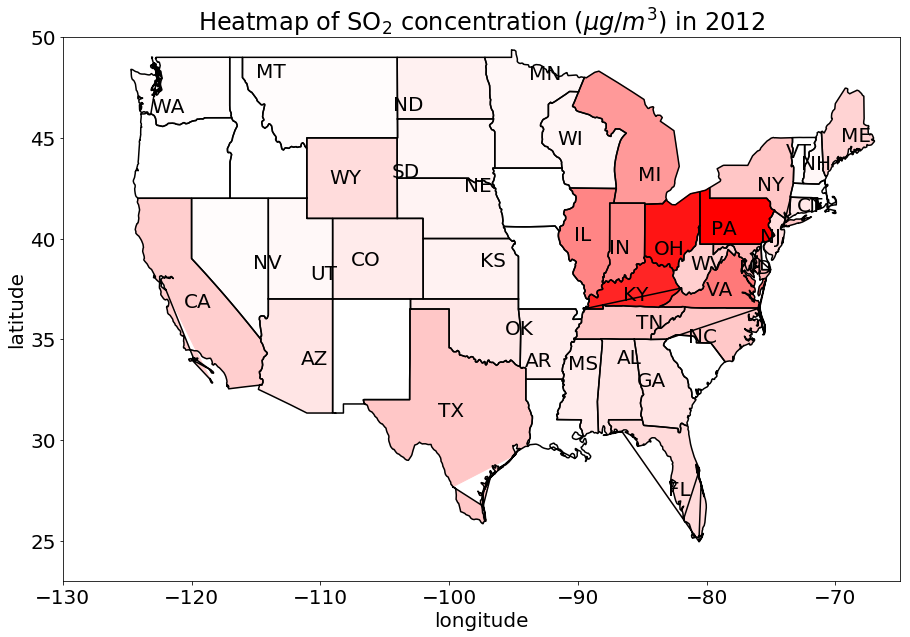

In [129]:
plt.figure(figsize=(15,10))
yr = 2012
c_so2_state = c_each_state.loc[c_each_state["year"] == yr]
for shape in world['United States']:
    x = [p[0] for p in shape.points]
    y = [p[1] for p in shape.points]
    plt.plot(x,y, c='k')


for i in range(c_so2_state.shape[0]):
    if c_so2_state.state_code.iloc[i] not in ["AK", "HI", "ON"]:
        plt.text(c_so2_state["longitude"].iloc[i]-1, c_so2_state["latitude"].iloc[i]-0.5, c_so2_state.state_code.iloc[i])

vmax = max(c_so2_state["total_SO2"])
print vmax
for i in range(c_so2_state.shape[0]):
    try:
        shape = world['United States'][state_to_shape[c_so2_state["state_code"].iloc[i]]]
    except:
        continue
    
    x = [p[0] for p in shape.points]
    y = [p[1] for p in shape.points]
    plt.fill(x,y, color=[1, 1-c_so2_state["total_SO2"].iloc[i]/vmax,1-c_so2_state["total_SO2"].iloc[i]/vmax])
    
plt.title("Heatmap of SO$_2$ concentration ($\mu g/m^3$) in 2012")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis([-130, -65, 23,50])
plt.savefig("../plots/heatmap_so2.png", dpi=200)

514.9277


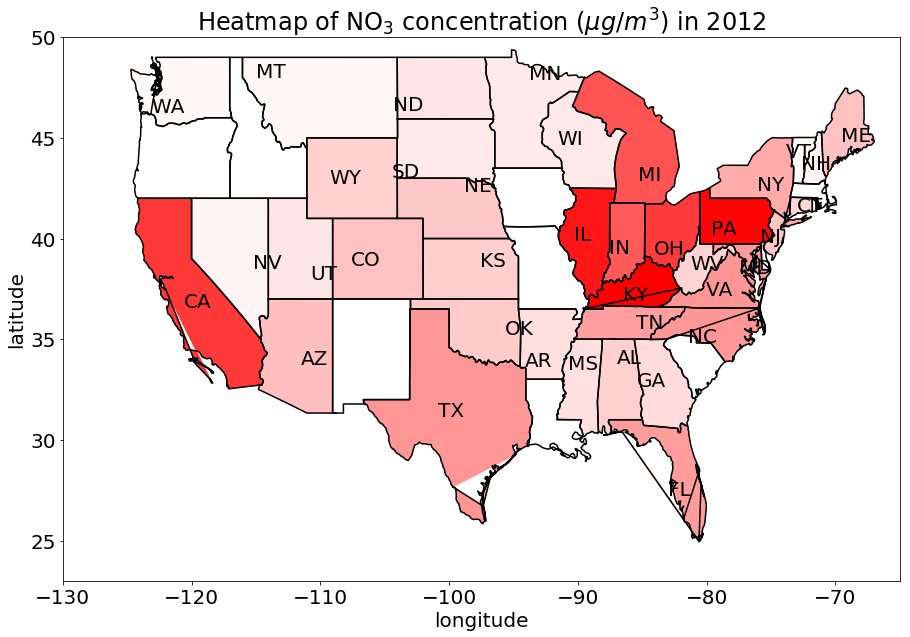

In [130]:
plt.figure(figsize=(15,10))
yr = 2012
c_so2_state = c_each_state.loc[c_each_state["year"] == yr]
for shape in world['United States']:
    x = [p[0] for p in shape.points]
    y = [p[1] for p in shape.points]
    plt.plot(x,y, c='k')


for i in range(c_so2_state.shape[0]):
    if c_so2_state.state_code.iloc[i] not in ["AK", "HI", "ON"]:
        plt.text(c_so2_state["longitude"].iloc[i]-1, c_so2_state["latitude"].iloc[i]-0.5, c_so2_state.state_code.iloc[i])

vmax = max(c_so2_state["total_NO3"])
print vmax
for i in range(c_so2_state.shape[0]):
    try:
        shape = world['United States'][state_to_shape[c_so2_state["state_code"].iloc[i]]]
    except:
        continue
    
    x = [p[0] for p in shape.points]
    y = [p[1] for p in shape.points]
    plt.fill(x,y, color=[1, 1-c_so2_state["total_NO3"].iloc[i]/vmax,1-c_so2_state["total_NO3"].iloc[i]/vmax])
    
plt.title("Heatmap of NO$_3$ concentration ($\mu g/m^3$) in 2012")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis([-130, -65, 23,50])
plt.savefig("../plots/heatmap_no3.png", dpi=200)